!wget http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv

!wget http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv

!wget http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
%matplotlib inline


In [2]:
def read_data(path:str):
    return pd.read_csv(path)

def drop_info(drop_list:list, data:pd.DataFrame):
    for d_l in drop_list:
        data = data.drop(d_l, axis=1)
    return data
   

casualty_data = read_data('../../data/kaggle/RoadSafetyData/dftRoadSafetyData_Casualties_2018.csv')
accident_data = read_data('../../data/kaggle/RoadSafetyData/dftRoadSafetyData_Accidents_2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:


# casualty_data = drop_info(['Vehicle_Reference', 'Casualty_Reference','Pedestrian_Location','Pedestrian_Movement',
#     'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker'],casualty_data )
casualty_data = drop_info( \
['Bus_or_Coach_Passenger', 'Car_Passenger', 
                                    'Pedestrian_Movement', 'Pedestrian_Location', 
                                    'Casualty_Reference', 'Vehicle_Reference', 
                                    'Casualty_Class', 'Age_of_Casualty',  
                                     'Casualty_IMD_Decile', 
                                    'Pedestrian_Road_Maintenance_Worker'],
                          casualty_data )

accident_data = drop_info( \
# ['Number_of_Vehicles','Number_of_Casualties','1st_Road_Number',
#      '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 
#                  'Pedestrian_Crossing-Physical_Facilities', 
#                  'Special_Conditions_at_Site', 
#                  'Carriageway_Hazards',

#                  'Date','Local_Authority_(Highway)', 'LSOA_of_Accident_Location',
#                  'Time'
#                      ], accident_data
#          )

['Number_of_Vehicles', 'Local_Authority_(District)', 
#                                     'Police_Force',
                         'Location_Easting_OSGR', 
                                    'Location_Northing_OSGR',
#                                    'Speed_limit',
                                    '1st_Road_Class', 
#                           'Road_Type',
                                     'Date', 'Time', 
                                    'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                                    '2nd_Road_Number', 'Special_Conditions_at_Site', 
                                    'Carriageway_Hazards', 'Number_of_Casualties',
                                    'Pedestrian_Crossing-Physical_Facilities', 
                                    'Pedestrian_Crossing-Human_Control',
#                                     'Did_Police_Officer_Attend_Scene_of_Accident', 
                                    'Local_Authority_(Highway)', 
                                    'LSOA_of_Accident_Location', 'Accident_Severity', 
                                    '1st_Road_Number'],
                    accident_data
         )

In [3]:

casualty_and_accident_data = pd.merge(accident_data, casualty_data, on='Accident_Index')
casualty_and_accident_data = casualty_and_accident_data.drop(['Accident_Index'], axis=1)
casualty_and_accident_data = casualty_and_accident_data.dropna()


In [8]:
def make_d(_data : pd.DataFrame, attr:str)->OrderedDict:
    data = OrderedDict()
    for d in _data[attr]:
        if data.get(d,None) == None:
            data[d] = 0
        else:
            data[d] +=1
    
    data_l = sorted(data.items() , key = lambda x:x[1])
    data = OrderedDict()
    for l in data_l:
        data[l[0]] = l[1]
        
    return data

Date_d = make_d(casualty_and_accident_data, 'Date')
Time_d = make_d(casualty_and_accident_data, 'Time')
Highway_d = make_d(casualty_and_accident_data, 'Local_Authority_(Highway)')
LSOA_d = make_d(casualty_and_accident_data, 'LSOA_of_Accident_Location')


casualty_and_accident_data['Date_d'] = [Date_d[d] for d in casualty_and_accident_data['Date'] ]
casualty_and_accident_data['Time_d'] = [Time_d[d] for d in casualty_and_accident_data['Time'] ]
casualty_and_accident_data['Highway_d'] = [Highway_d[d] for d in casualty_and_accident_data['Local_Authority_(Highway)'] ]
casualty_and_accident_data['LSOA_d'] = [LSOA_d[d] for d in casualty_and_accident_data['LSOA_of_Accident_Location'] ]
casualty_and_accident_data = casualty_and_accident_data.drop([ \
                                    'Date','Time','Local_Authority_(Highway)',
                                                             'LSOA_of_Accident_Location'],axis=1)

In [9]:
casualty_and_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132500 entries, 0 to 132563
Data columns (total 46 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        132500 non-null  float64
 1   Location_Northing_OSGR                       132500 non-null  float64
 2   Longitude                                    132500 non-null  float64
 3   Latitude                                     132500 non-null  float64
 4   Police_Force                                 132500 non-null  int64  
 5   Accident_Severity                            132500 non-null  int64  
 6   Number_of_Vehicles                           132500 non-null  int64  
 7   Number_of_Casualties                         132500 non-null  int64  
 8   Day_of_Week                                  132500 non-null  int64  
 9   Local_Authority_(District)                   132500 non-nul

In [11]:
#  feature normalize
def stand_norm(df):
    _max = df.max()
    _min = df.min()
    _mean = df.mean()
    return (df-_min) / (_max-_min )
    
# norm 
ret = pd.DataFrame()
for f in  casualty_and_accident_data:

    ret[f] = stand_norm(casualty_and_accident_data[f])
    

In [12]:
[f'{f} has {ret[f].isnull().sum()} null variable'  for f in ret]


['Location_Easting_OSGR has 0 null variable',
 'Location_Northing_OSGR has 0 null variable',
 'Longitude has 0 null variable',
 'Latitude has 0 null variable',
 'Police_Force has 0 null variable',
 'Accident_Severity has 0 null variable',
 'Number_of_Vehicles has 0 null variable',
 'Number_of_Casualties has 0 null variable',
 'Day_of_Week has 0 null variable',
 'Local_Authority_(District) has 0 null variable',
 '1st_Road_Class has 0 null variable',
 '1st_Road_Number has 0 null variable',
 'Road_Type has 0 null variable',
 'Speed_limit has 0 null variable',
 'Junction_Detail has 0 null variable',
 'Junction_Control has 0 null variable',
 '2nd_Road_Class has 0 null variable',
 '2nd_Road_Number has 0 null variable',
 'Pedestrian_Crossing-Human_Control has 0 null variable',
 'Pedestrian_Crossing-Physical_Facilities has 0 null variable',
 'Light_Conditions has 0 null variable',
 'Weather_Conditions has 0 null variable',
 'Road_Surface_Conditions has 0 null variable',
 'Special_Conditions_at

In [13]:
ret = ret.sort_values(by=['Casualty_Severity'])

In [9]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132500 entries, 132563 to 0
Data columns (total 46 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        132500 non-null  float64
 1   Location_Northing_OSGR                       132500 non-null  float64
 2   Longitude                                    132500 non-null  float64
 3   Latitude                                     132500 non-null  float64
 4   Police_Force                                 132500 non-null  float64
 5   Accident_Severity                            132500 non-null  float64
 6   Number_of_Vehicles                           132500 non-null  float64
 7   Number_of_Casualties                         132500 non-null  float64
 8   Day_of_Week                                  132500 non-null  float64
 9   Local_Authority_(District)                   132500 non-nul

In [10]:
# import seaborn as sns
# sns.set(style="white")
# # Compute the correlation matrix
# corr = ret.corr()




# # Draw the correlation matrix
# sns.heatmap(corr, square=True, linewidths=.3)

# plt.title("Accident Correlation")
# plt.show()

In [11]:
np.save('../data/kaggle/RoadSafetyData/Road_safety_data_Casualty_Severity.npy', ret['Casualty_Severity'].values)
np.save('../data/kaggle/RoadSafetyData/Road_safety_data.npy', ret.drop('Casualty_Severity',axis=1).values)

# ML

In [12]:
from sklearn import svm, tree
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
raw_data_x = np.load('../data/kaggle/RoadSafetyData/Road_safety_data.npy')
raw_data_y = np.load('../data/kaggle/RoadSafetyData/Road_safety_data_Casualty_Severity.npy')

In [14]:
raw_data_y = 2*raw_data_y

In [15]:
raw_data_x.shape, raw_data_y.shape

((132500, 45), (132500,))

In [16]:
def random_split_data(raw_data_x,raw_data_y ):
    
    randomize = np.arange(len(raw_data_x))
    np.random.shuffle(randomize)
    random_data_x = raw_data_x[randomize]
    random_data_y = raw_data_y[randomize]
    split_size = int(len(random_data_y)*0.8)
    train_x = random_data_x[:split_size]
    train_y = random_data_y[:split_size]
    dev_x = random_data_x[split_size:]
    dev_y = random_data_y[split_size:]
    return train_x, train_y, dev_x, dev_y

In [17]:
sam = {i:0 for i in [0,1,2]}
for y in raw_data_y:
    sam[y]+=1
print(sam)

{0: 1550, 1: 21422, 2: 109528}


In [18]:
X = np.zeros((sam[0]*3,raw_data_x.shape[1]))
Y = np.zeros((sam[0]*3, ))
a,b = sam[0],sam[0]+sam[1]
for i,(x,y) in enumerate(zip(raw_data_x[:sam[0]],raw_data_y[:sam[0]])):  # :sam[0]
    X[i] = x
    Y[i] = y
for i,(x,y) in enumerate(zip(raw_data_x[sam[0]:sam[0]+sam[0]],raw_data_y[sam[0]:sam[0]+sam[0]])): 
    # sam[0]: sam[0]+sam[0]
    X[sam[0]+i] = x
    Y[sam[0]+i] = y
    
for i,(x,y) in enumerate(zip(raw_data_x[sam[0]+sam[1]:sam[0]+sam[1]+sam[0]],raw_data_y[sam[0]+sam[1]:sam[0]+sam[1]+sam[0]])):
#     sam[0]+sam[1] : sam[0]+sam[1]+sam[0]
    X[sam[0]*2+i] = x
    Y[sam[0]*2+i] = y
    
train_x, train_y, dev_x, dev_y = random_split_data(X, Y)

In [20]:
# decision tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

pred_tree = clf.predict(dev_x)
pred_train_tree = clf.predict(train_x)
print(np.sum(pred_tree==dev_y)/len(dev_y), np.sum(pred_train_tree==train_y)/len(train_y))

0.9924731182795699 1.0


In [21]:
#svm
# Import the `svm` model
from sklearn import svm

# Create the SVC model 
# svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
clf = svm.SVC()
# Fit the data to the SVC model
clf.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
pred_train_tree = clf.predict(train_x)
pred_svm = clf.predict(dev_x)
print(np.sum(pred_svm==dev_y)/len(dev_y), np.sum(pred_train_tree==train_y)/len(train_y))

0.9903225806451613 0.9905913978494624


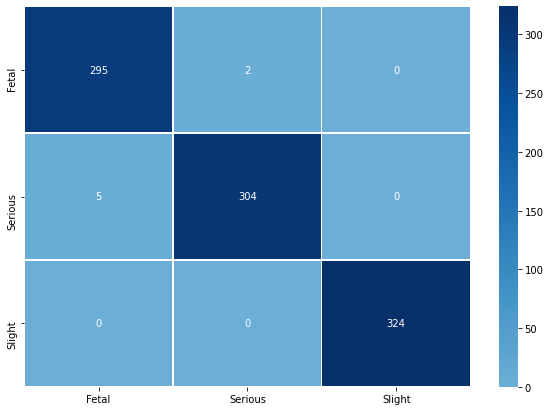

In [25]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns


cm = confusion_matrix(y_true=dev_y, y_pred=pred_tree)
cm_df = pd.DataFrame(cm)

label = {0:'Fetal',1:'Serious', 2:'Slight'}
plt.figure(figsize=(10, 7))


vis_kwargs =dict(
    data=cm_df,
    cmap=plt.cm.Blues, 
    center=0.5, 
    annot=True, 
    fmt='.0f', 
    linewidths=.3,
    xticklabels= label.values(),
    yticklabels=label.values()
)
sns.heatmap(**vis_kwargs)


# Neural Network

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import  DataLoader,random_split, Dataset
from kk_nn import focal_loss, NN, train, evaluate, RoadDataset, WarmUpLR
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
raw_data_x = np.load('../data/kaggle/RoadSafetyData/Road_safety_data.npy')
raw_data_y = np.load('../data/kaggle/RoadSafetyData/Road_safety_data_Casualty_Severity.npy')

In [3]:
raw_data_y = 2*raw_data_y

In [4]:
raw_data_x.shape, raw_data_y.shape

((132500, 45), (132500,))

In [5]:
sam = {i:0 for i in [0,1,2]}
for y in raw_data_y:
    sam[y]+=1
print(sam)

{0: 1550, 1: 21422, 2: 109528}


In [6]:
# balance sample

X = np.zeros((sam[0]*3,raw_data_x.shape[1]))
Y = np.zeros((sam[0]*3, ))
a,b = sam[0],sam[0]+sam[1]
for i,(x,y) in enumerate(zip(raw_data_x[:sam[0]],raw_data_y[:sam[0]])):  # :sam[0]
    X[i] = x
    Y[i] = y
for i,(x,y) in enumerate(zip(raw_data_x[sam[0]:sam[0]+sam[0]],raw_data_y[sam[0]:sam[0]+sam[0]])): 
    # sam[0]: sam[0]+sam[0]
    X[sam[0]+i] = x
    Y[sam[0]+i] = y
    
for i,(x,y) in enumerate(zip(raw_data_x[sam[0]+sam[1]:sam[0]+sam[1]+sam[0]],raw_data_y[sam[0]+sam[1]:sam[0]+sam[1]+sam[0]])):
#     sam[0]+sam[1] : sam[0]+sam[1]+sam[0]
    X[sam[0]*2+i] = x
    Y[sam[0]*2+i] = y
    


In [7]:
# parameter setting
num_epochs = 1000
lr = 1
num_classes= 3
batch_size = 128
CUDA = torch.cuda.is_available()
device = torch.device("cuda" if CUDA else "cpu")
warm = 1
loader_kwargs = {
    'num_workers' : 2,
    'pin_memory' : True,
    'batch_size' : batch_size,
    'shuffle' : True
}

In [8]:
dataset = RoadDataset(X, Y )
# dataset = RoadDataset(raw_data_x, raw_data_y )

print(dataset.get())
train_size = int(len(dataset) * 0.9)
valid_size = len(dataset) - train_size
train_set, valid_set = random_split(dataset , lengths=[train_size,valid_size ])
train_dataloader = DataLoader(train_set, **loader_kwargs) 
dev_dataloader = DataLoader(valid_set, **loader_kwargs)

{0: 1550, 1: 1550, 2: 1550}


In [9]:
model = NN(in_dim=raw_data_x.shape[1], num_classes=num_classes)
if CUDA:
    model = model.to(device)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr,
#                                   momentum=0.9, weight_decay=5e-4)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                   betas=(0.9, 0.999), eps=1e-08, weight_decay=5e-4, amsgrad=False)
train_scheduler = torch.optim.lr_scheduler.MultiStepLR(
            optimizer, milestones= [60, 120, 160], gamma=0.2)  # learning rate decay

criterion = nn.CrossEntropyLoss() #  98.5544%
# criterion = nn.MSELoss() 
# criterion = focal_loss(alpha=list(sam.values()), gamma=2, num_classes=num_classes) #  98.5544%
warmup_scheduler = WarmUpLR(optimizer, len(train_dataloader) * warm)

In [10]:
model.to(device)
for epoch in range(num_epochs): 
    # balance sample
    if epoch > warm:
            train_scheduler.step(epoch)
    train(train_dataloader, model, criterion, optimizer, epoch, warm,  warmup_scheduler)
        
    evaluate(dev_dataloader, model, criterion, epoch) # baseline : 98.7

Evaluating Epoch: 0	Loss: 0.0070	 Accuracy: 62.3047%
Evaluating Epoch: 1	Loss: 0.0085	 Accuracy: 50.3906%


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Evaluating Epoch: 2	Loss: 0.0081	 Accuracy: 50.3906%
Evaluating Epoch: 3	Loss: 0.0073	 Accuracy: 63.0859%
Evaluating Epoch: 4	Loss: 0.0071	 Accuracy: 65.0391%
Evaluating Epoch: 5	Loss: 0.0070	 Accuracy: 66.4062%
Evaluating Epoch: 6	Loss: 0.0070	 Accuracy: 66.6016%
Evaluating Epoch: 7	Loss: 0.0068	 Accuracy: 67.1875%
Evaluating Epoch: 8	Loss: 0.0068	 Accuracy: 67.1875%
Evaluating Epoch: 9	Loss: 0.0068	 Accuracy: 67.7734%
Evaluating Epoch: 10	Loss: 0.0068	 Accuracy: 67.9688%
Evaluating Epoch: 11	Loss: 0.0075	 Accuracy: 61.3281%
Evaluating Epoch: 12	Loss: 0.0080	 Accuracy: 55.6641%
Evaluating Epoch: 13	Loss: 0.0082	 Accuracy: 53.9062%
Evaluating Epoch: 14	Loss: 0.0083	 Accuracy: 52.5391%
Evaluating Epoch: 15	Loss: 0.0083	 Accuracy: 52.3438%
Evaluating Epoch: 16	Loss: 0.0083	 Accuracy: 52.3438%
Evaluating Epoch: 17	Loss: 0.0083	 Accuracy: 52.3438%
Evaluating Epoch: 18	Loss: 0.0084	 Accuracy: 52.3438%
Evaluating Epoch: 19	Loss: 0.0084	 Accuracy: 51.9531%
Evaluating Epoch: 20	Loss: 0.0084	 A

Evaluating Epoch: 153	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 154	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 155	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 156	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 157	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 158	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 159	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 160	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 161	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 162	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 163	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 164	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 165	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 166	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 167	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 168	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 169	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 170	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating

Evaluating Epoch: 302	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 303	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 304	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 305	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 306	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 307	Loss: 0.0093	 Accuracy: 28.9062%
Evaluating Epoch: 308	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 309	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 310	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 311	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 312	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 313	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 314	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 315	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 316	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 317	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 318	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating Epoch: 319	Loss: 0.0094	 Accuracy: 28.9062%
Evaluating

Evaluating Epoch: 451	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 452	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 453	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 454	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 455	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 456	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 457	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 458	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 459	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 460	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 461	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 462	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 463	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 464	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 465	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 466	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating Epoch: 467	Loss: 0.0097	 Accuracy: 28.9062%
Evaluating Epoch: 468	Loss: 0.0098	 Accuracy: 28.9062%
Evaluating

Evaluating Epoch: 600	Loss: 0.0092	 Accuracy: 28.9062%
Evaluating Epoch: 601	Loss: 0.0092	 Accuracy: 28.9062%
Evaluating Epoch: 602	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 603	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 604	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 605	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 606	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 607	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 608	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 609	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 610	Loss: 0.0091	 Accuracy: 28.9062%
Evaluating Epoch: 611	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 612	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 613	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 614	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 615	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 616	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating Epoch: 617	Loss: 0.0090	 Accuracy: 28.9062%
Evaluating

Evaluating Epoch: 749	Loss: 0.0088	 Accuracy: 28.9062%
Evaluating Epoch: 750	Loss: 0.0088	 Accuracy: 28.9062%
Evaluating Epoch: 751	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 752	Loss: 0.0088	 Accuracy: 28.9062%
Evaluating Epoch: 753	Loss: 0.0088	 Accuracy: 28.9062%
Evaluating Epoch: 754	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 755	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 756	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 757	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 758	Loss: 0.0088	 Accuracy: 28.9062%
Evaluating Epoch: 759	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 760	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 761	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 762	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 763	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 764	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 765	Loss: 0.0087	 Accuracy: 28.9062%
Evaluating Epoch: 766	Loss: 0.0086	 Accuracy: 28.9062%
Evaluating

Evaluating Epoch: 898	Loss: 0.0083	 Accuracy: 28.9062%
Evaluating Epoch: 899	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 900	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 901	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 902	Loss: 0.0083	 Accuracy: 28.9062%
Evaluating Epoch: 903	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 904	Loss: 0.0083	 Accuracy: 28.9062%
Evaluating Epoch: 905	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 906	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 907	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 908	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 909	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 910	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 911	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 912	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 913	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 914	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating Epoch: 915	Loss: 0.0082	 Accuracy: 28.9062%
Evaluating

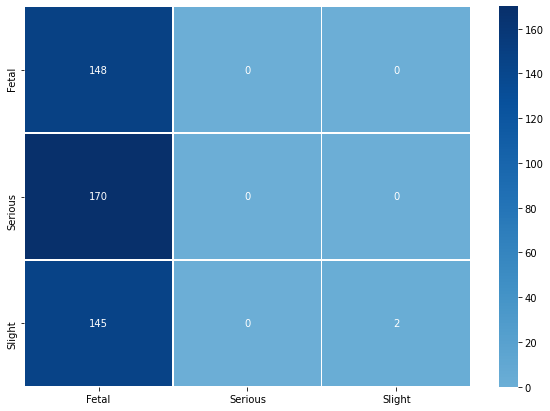

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

Y_true=[]
X_pred =[]
for x,y in dev_dataloader:
    Y_true.extend(y.data.numpy().tolist())

    _pred = model(x.cuda()).cpu().data.numpy().tolist()
    X_pred.extend(np.argmax(_pred, axis=1) )
    
cm = confusion_matrix(y_true=Y_true, y_pred=X_pred)
cm_df = pd.DataFrame(cm)

label = {0:'Fetal',1:'Serious', 2:'Slight'}
plt.figure(figsize=(10, 7))


vis_kwargs =dict(
    data=cm_df,
    cmap=plt.cm.Blues, 
    center=0.5, 
    annot=True, 
    fmt='.0f', 
    linewidths=.3,
    xticklabels= label.values(),
    yticklabels=label.values()
)
sns.heatmap(**vis_kwargs)
